# 1st Model Training

In [ ]:
import numpy as np

# Load the X and Y arrays from the npy files
Xdata = np.load(r'/content/drive/MyDrive/FYP/1st Model /NP arays/X.npz')
X = Xdata['X']


In [ ]:
Ydata = np.load(r'/content/drive/MyDrive/FYP/1st Model /NP arays/Y.npz')
Y = Ydata['Y']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'X' is your images and 'y' is the corresponding labels (0 for non-cancerous, 1 for cancerous)
# Replace 'X' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Import Dropout here

# Define the CNN model
model = keras.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(32))
model.add(layers.Dense(2, activation='softmax'))  # Assuming 7 different cancer types

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
Y

NameError: name 'Y' is not defined

In [ ]:
model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
49/49 [==============================] - 992s 20s/step - loss: 0.5988 - accuracy: 0.7590 - val_loss: 0.3094 - val_accuracy: 0.8715
Epoch 2/10
49/49 [==============================] - 980s 20s/step - loss: 0.2360 - accuracy: 0.9126 - val_loss: 0.2510 - val_accuracy: 0.9049
Epoch 3/10
49/49 [==============================] - 982s 20s/step - loss: 0.1858 - accuracy: 0.9325 - val_loss: 0.1194 - val_accuracy: 0.9563
Epoch 4/10
49/49 [==============================] - 979s 20s/step - loss: 0.1662 - accuracy: 0.9402 - val_loss: 0.1963 - val_accuracy: 0.9460
Epoch 5/10
49/49 [==============================] - 958s 19s/step - loss: 0.1281 - accuracy: 0.9557 - val_loss: 0.0969 - val_accuracy: 0.9640
Epoch 6/10
49/49 [==============================] - 955s 20s/step - loss: 0.1757 - accuracy: 0.9299 - val_loss: 0.1958 - val_accuracy: 0.9537
Epoch 7/10
49/49 [==============================] - 970s 20s/step - loss: 0.1141 - accuracy: 0.9582 - val_loss: 0.1449 - val_accuracy: 0.9692
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Model1.keras')

In [ ]:
from tensorflow import keras
import cv2
model = keras.models.load_model('/content/drive/MyDrive/Model1.keras')

13/13 [==============================] - 63s 5s/step
Confusion Matrix:
[[186   6]
 [  9 188]]


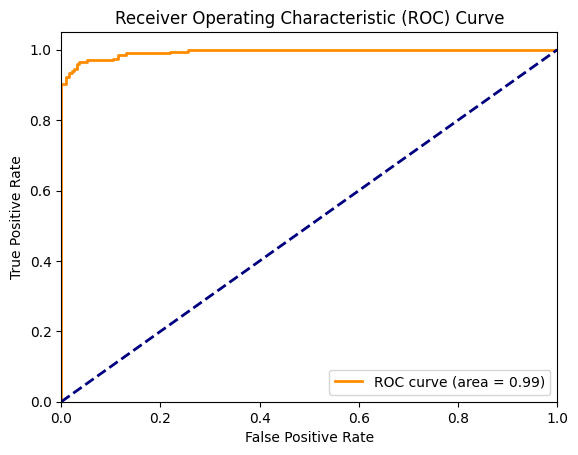

Classification Report:
               precision    recall  f1-score   support

non-cancerous       0.95      0.97      0.96       192
    cancerous       0.97      0.95      0.96       197

     accuracy                           0.96       389
    macro avg       0.96      0.96      0.96       389
 weighted avg       0.96      0.96      0.96       389



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Predictions on test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])  # Assuming cancerous class is positive (index 1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification Report
target_names = ['non-cancerous', 'cancerous']  # Assuming 0 is non-cancerous and 1 is cancerous
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))
